Customer ID: A unique identifier assigned to each customer. It helps distinguish one shopper’s data from another without revealing their personal identity.

Age: The age of the customer in years, which can provide insights into generational shopping habits and how preferences differ across age groups.

Gender: Indicates whether the customer is male or female, allowing analysis of gender-based buying trends and preferences in product categories.

Item Purchased: The specific product that the customer bought, giving a direct view of consumer demand and popular items in the dataset.

Category: The broader classification of the purchased item, such as clothing or footwear, which helps in grouping products and understanding category-level trends.

Purchase Amount (USD): The total money spent on the purchase in U.S. dollars, which reflects customer spending power and the value of each transaction.

Location: The state or region where the customer resides, useful for identifying geographical shopping patterns and regional differences in consumer behaviour.

Size: The size of the purchased item (e.g., S, M, L), which helps reveal customer preferences in apparel and how sizing impacts sales.

Color: The chosen color of the purchased item, offering insights into which colors are more appealing to consumers during different seasons or product categories.

Season: The season (Winter, Spring, etc.) in which the purchase was made, showing how customer demand changes across seasonal trends.

Review Rating: A numerical score reflecting the customer’s satisfaction with the product, valuable for measuring quality perception and post-purchase behaviour.

Subscription Status: Indicates whether the customer has an active subscription with the store, which may influence loyalty, discounts, and purchase frequency.

Shipping Type: The delivery option chosen by the customer, such as free shipping or express, which highlights convenience preferences and urgency of purchase.

Discount Applied: Shows whether a discount was used during the purchase, allowing analysis of how discounts affect buying decisions and sales growth.

Promo Code Used: Specifies if the customer used a promotional code, useful for understanding the impact of marketing strategies on purchase behaviour.

Previous Purchases: The number of items the customer has bought before, reflecting their shopping history and overall loyalty to the store.

Payment Method: The mode of payment used (Credit Card, PayPal, etc.), which sheds light on financial behaviour and preferred transaction methods.

Frequency of Purchases: Indicates how often the customer engages in purchasing activities, a critical metric for assessing customer loyalty and lifetime valu

In [2]:
import pandas as pd
import numpy as np
import plotly.express as px 
import plotly.figure_factory as ff 
import plotly.graph_objects as go 

In [3]:
data=pd.read_csv('shopping_behavior_updated.csv')

In [4]:
df=data.copy()

In [5]:
df.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually


# what is info about data

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Customer ID             3900 non-null   int64  
 1   Age                     3900 non-null   int64  
 2   Gender                  3900 non-null   object 
 3   Item Purchased          3900 non-null   object 
 4   Category                3900 non-null   object 
 5   Purchase Amount (USD)   3900 non-null   int64  
 6   Location                3900 non-null   object 
 7   Size                    3900 non-null   object 
 8   Color                   3900 non-null   object 
 9   Season                  3900 non-null   object 
 10  Review Rating           3900 non-null   float64
 11  Subscription Status     3900 non-null   object 
 12  Shipping Type           3900 non-null   object 
 13  Discount Applied        3900 non-null   object 
 14  Promo Code Used         3900 non-null   

# how many duplicates we have

In [9]:
df.duplicated().sum()

0

# How many nulls 

In [11]:
df.isna().sum()

Customer ID               0
Age                       0
Gender                    0
Item Purchased            0
Category                  0
Purchase Amount (USD)     0
Location                  0
Size                      0
Color                     0
Season                    0
Review Rating             0
Subscription Status       0
Shipping Type             0
Discount Applied          0
Promo Code Used           0
Previous Purchases        0
Payment Method            0
Frequency of Purchases    0
dtype: int64

# in this  descriptions  we will notice that we will not have outliers it is normal distribution

In [13]:
df.describe()

,Customer ID,Age,Purchase Amount (USD),Review Rating,Previous Purchases
count,3900.000000,3900.000000,3900.000000,3900.000000,3900.000000
mean,1950.500000,44.068462,59.764359,3.749949,25.351538
std,1125.977353,15.207589,23.685392,0.716223,14.447125
min,1.000000,18.000000,20.000000,2.500000,1.000000
25%,975.750000,31.000000,39.000000,3.100000,13.000000
50%,1950.500000,44.000000,60.000000,3.700000,25.000000
75%,2925.250000,57.000000,81.000000,4.400000,38.000000
max,3900.000000,70.000000,100.000000,5.000000,50.000000


In [14]:
df.describe(include='O')

,Gender,Item Purchased,Category,Location,Size,Color,Season,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Payment Method,Frequency of Purchases
count,3900,3900,3900,3900,3900,3900,3900,3900,3900,3900,3900,3900,3900
unique,2,25,4,50,4,25,4,2,6,2,2,6,7
top,Male,Blouse,Clothing,Montana,M,Olive,Spring,No,Free Shipping,No,No,PayPal,Every 3 Months
freq,2652,171,1737,96,1755,177,999,2847,675,2223,2223,677,584


# How data is distributed depend on Age

In [16]:
px.histogram(data_frame=df,x='Age',nbins=110)

#  What is the the most gender have ocuuuped orders

In [18]:
px.pie(data_frame=df,names='Gender')

# Where is the location of state that have the most purchase amount 

In [20]:
sales_loc=df.groupby(['Location'])['Purchase Amount (USD)'].sum().reset_index()
sales_loc.sort_values(by='Purchase Amount (USD)', ascending=False).head(10)

,Location,Purchase Amount (USD)
25,Montana,5784
12,Illinois,5617
4,California,5605
11,Idaho,5587
27,Nevada,5514
0,Alabama,5261
31,New York,5257
33,North Dakota,5220
47,West Virginia,5174
26,Nebraska,5172


# Top 10 states that made orders

In [22]:
fig=px.histogram(data_frame=sales_loc.sort_values(by='Purchase Amount (USD)', ascending=False).head(10),y='Location',x='Purchase Amount (USD)',text_auto=True)
fig.update_yaxes(categoryorder = 'total ascending')

# The most categeoty have order is Clothing  

In [24]:
px.pie(data_frame=df,names='Category',title='percentage of category of order in')

# Which season have drop in orders

In [26]:
fig=px.line(
    data_frame=df.groupby("Season")["Purchase Amount (USD)"].sum().reset_index(),
    x="Season",
    y="Purchase Amount (USD)",
    title='sesonality and drop trend'
    
    
    
)
summary = df.groupby("Season")["Purchase Amount (USD)"].sum().reset_index()
min_row = summary.loc[summary["Purchase Amount (USD)"].idxmin()]

fig.add_annotation(
    x=min_row["Season"],
    y=min_row["Purchase Amount (USD)"],
    text="Lowest Point",
    showarrow=True,
    arrowhead=2
)

fig.show()

# Which type of Shipping type have most ordres

In [28]:
df.value_counts("Shipping Type")

Shipping Type
Free Shipping     675
Standard          654
Store Pickup      650
Next Day Air      648
Express           646
2-Day Shipping    627
Name: count, dtype: int64

In [29]:
px.histogram(data_frame=df,x='Shipping Type',y='Purchase Amount (USD)',text_auto=True,marginal='box')

# in this chart we emphasise that it normally distributeed

In [31]:
total = df["Purchase Amount (USD)"].tolist()
shipping=df['Shipping Type'].tolist()
fig = ff.create_distplot(
    [total],                  
    group_labels=["Purchase Amount (USD)"], 
    show_hist=True,
    show_rug=False
)

fig.show()

# What is the category that make profits

In [33]:
px.histogram(data_frame=df,x='Category',y='Purchase Amount (USD)',title="Distribution of Purchases by Category",text_auto=True)

# what s the most shhippying way are frequent for every Category

In [35]:
px.histogram(
    df,
    x="Category",
    color="Shipping Type",
    barmode="stack",  # use "stack" if you want stacked bars
    title="Purchases by Category and Shipping Type"
)

In [36]:
px.histogram(
    df,
    x='Item Purchased',
    color='Season',
    barmode='stack',
    barnorm="percent",
    
)

# What is the most items that have purchased in very Season

In [38]:
top_items = df['Item Purchased'].value_counts().nlargest(10).index # nlargest
filtered = df[df['Item Purchased'].isin(top_items)]

px.histogram(
    filtered, 
    x="Item Purchased", 
    color="Season", 
    barmode="group", 
    title="Top 10 Items Purchased by Season",
    nbins=10
)

# what is the colors that poplular in every season


In [40]:
# Get top 10 colors
top_colors = df['Color'].value_counts().nlargest(10).index   # <-- use .index, not reset_index

# Filter only top colors
filtered = df[df['Color'].isin(top_colors)]

# Plot histogram
color_map = {
    "Maroon": "maroon",
    "Silver": "silver",
    "Olive": "olive",
    "Violet": "violet",
    "Teal": "teal",
    "Black": "black",
    "Green": "green",
    "Cyan": "cyan",
    "Yellow": "yellow",
    "Gray":"gray"
}

px.histogram(
    filtered,
    x="Season",
    color="Color",
    barmode="group",
    color_discrete_map=color_map,
    title="Seasonal Distribution of Top 10 Colors (Realistic)"
)

# Reviews of every catogy of clothing

In [42]:
item_rev=df.groupby(['Category'])['Review Rating'].mean().reset_index()
item_rev

,Category,Review Rating
0,Accessories,3.768629
1,Clothing,3.723143
2,Footwear,3.790651
3,Outerwear,3.746914


In [43]:
px.bar(
    item_rev,
    x='Category',
    y='Review Rating',
    title='Average Review Rating per Item'
)

In [44]:
cat_p=df.groupby(['Category'])['Purchase Amount (USD)'].sum().reset_index()

In [45]:
px.funnel(cat_p,x='Category',y='Purchase Amount (USD)')

# which iteam have  the best review and bad revview

In [47]:
item_rev_mean = df.groupby('Item Purchased')['Review Rating'].mean().reset_index()
fig = px.scatter(
    item_rev_mean.sort_values('Item Purchased',ascending=False).head(10),
    x="Item Purchased",
    y="Review Rating",
    size="Review Rating",   
    color="Review Rating",  
    title="Average Review Rating per Item"
)

fig.update_xaxes(tickangle=45)  # rotate labels for readability
fig.show()

In [48]:
px.treemap(
    df,
    path=['Category','Item Purchased'],
    values='Purchase Amount (USD)',
    title='Revenue Treemap: Category → Item'
).update_traces(
    textinfo="label+value"   # customize annotation style
)


In [49]:
fig = px.violin(
    df, x="Category", y="Purchase Amount (USD)",
    color="Category", box=True, points="all",
    title="Purchase Amount – Violin by Category"
)
fig.show()

In [50]:
import plotly.figure_factory as ff

groups = []
labels = []

for cat, sub in df.groupby('Category'):
    groups.append(sub['Purchase Amount (USD)'].values)
    labels.append(cat)

fig = ff.create_distplot(
    groups, labels,
    show_hist=False,        # just smooth curves
    show_rug=False
)
fig.update_layout(
    title="Purchase Amount – KDE by Category",
    xaxis_title="Purchase Amount (USD)",
    yaxis_title="Density",
    legend_title_text="Category"
)
fig.show()


In [51]:
cat_sum = df.groupby('Category', as_index=False)['Purchase Amount (USD)'].sum()
max_row = cat_sum.loc[cat_sum['Purchase Amount (USD)'].idxmax()]
fig = px.line(
    cat_sum,
    x='Category',
    y='Purchase Amount (USD)',
    markers=True,  # add points
    title="Total Purchase Amount by Category"
)

# Add annotation for max
fig.add_annotation(
    x=max_row['Category'],
    y=max_row['Purchase Amount (USD)'],
    text=f"Max: {max_row['Category']} ({max_row['Purchase Amount (USD)']})",
    showarrow=True,
    arrowhead=2,
    font=dict(color="red", size=12)
)

# Is there are any Outliers

In [53]:
# is there are any Outlier
px.box(df, y="Purchase Amount (USD)", points="all", title="Outlier Detection via Boxplot")


# What is the avaerage amount of ever category in ever Season 

In [55]:
df_grouped = df.groupby(['Season','Category'])['Purchase Amount (USD)'].mean().reset_index()

px.bar(
    df_grouped,
    x="Category",
    y="Purchase Amount (USD)",
    color="Season",
    barmode="group",
    title="Average Purchase Amount by Category and Season"
)


# What is the time of frequent purchase 

In [57]:
px.histogram(
    df,
    x="Frequency of Purchases",
    y="Purchase Amount (USD)",
    color="Category",        # no extra space
    histfunc="sum",          # could also be "avg" or "count"
    barmode="group",
    title="Purchase Amount by Frequency of Purchases and Category"
)


In [58]:
churn=df.groupby('Customer ID')['Previous Purchases'].sum().reset_index()
churn.describe()

,Customer ID,Previous Purchases
count,3900.000000,3900.000000
mean,1950.500000,25.351538
std,1125.977353,14.447125
min,1.000000,1.000000
25%,975.750000,13.000000
50%,1950.500000,25.000000
75%,2925.250000,38.000000
max,3900.000000,50.000000


# What is the churn rate of customers

In [60]:
# Group and sum
churn = df.groupby('Customer ID')['Previous Purchases'].sum().reset_index()

# Sort ascending
churn = churn.sort_values('Previous Purchases', ascending=False)
churn['Cumulative %'] = churn['Previous Purchases'].cumsum() / churn['Previous Purchases'].sum() * 100
# Show result
churn.head(10)   # show first 10 (lowest purchases)


,Customer ID,Previous Purchases,Cumulative %
3261,3262,50,0.050571
633,634,50,0.101142
2262,2263,50,0.151713
2264,2265,50,0.202284
124,125,50,0.252855
665,666,50,0.303426
3581,3582,50,0.353997
2099,2100,50,0.404568
313,314,50,0.455139
3205,3206,50,0.505709


In [61]:

#churn['Cumulative %'] = churn['Previous Purchases'].cumsum() / churn['Previous Purchases'].sum() * 100

fig = px.area(
    churn.head(10),
    y='Cumulative %',
    x='Customer ID',
    title='(Cumulative Purchases % by Customer)',
    markers=True,
    
)
fig.show()


# what is the status of customers

In [63]:

status_counts = df['Subscription Status'].value_counts().reset_index()
status_counts.columns = ['Subscription Status', 'Count']

fig = px.pie(
    status_counts,
    names='Subscription Status',
    values='Count',
    title='Customer Subscription Status Distribution'
    
)
fig.show()


In [64]:
df.groupby('Age')['Subscription Status'].value_counts(normalize=True)


Age  Subscription Status
18   No                     0.797101
     Yes                    0.202899
19   No                     0.716049
     Yes                    0.283951
20   No                     0.709677
                              ...   
68   Yes                    0.200000
69   No                     0.761364
     Yes                    0.238636
70   No                     0.686567
     Yes                    0.313433
Name: proportion, Length: 106, dtype: float64

# which gender have the most subscription

In [66]:
fig = px.bar(
    df.groupby(['Gender', 'Subscription Status']).size().reset_index(name='Count'),
    x='Gender',
    y='Count',
    color='Subscription Status',
    barmode='group',
    title='geneder Subscription'
)
fig.show()


In [67]:
fig = px.bar(
    df.groupby(['Category', 'Subscription Status']).size().reset_index(name='Count'),
    x='Category',
    y='Count',
    color='Subscription Status',
    title='Product Category',
    barmode='stack'
)
fig.update_layout(xaxis={'categoryorder': 'total descending'})
fig.show()


# which   category have the most subscription

In [69]:
trend=df.groupby('Season')['Subscription Status'].apply(lambda x: (x == 'No').mean() * 100).reset_index(name='Churn Rate (%)')


In [70]:
px.line(trend,
       x='Season',
       y='Churn Rate (%)',
       title='Churn Rate Trend by Season',
       markers=True)

In [71]:

df.groupby(['Season', 'Promo Code Used'])['Review Rating'].mean()


Season  Promo Code Used
Fall    No                 3.758651
        Yes                3.688161
Spring  No                 3.786047
        Yes                3.796364
Summer  No                 3.731203
        Yes                3.718676
Winter  No                 3.753610
        Yes                3.750120
Name: Review Rating, dtype: float64

# why we have probelm in Summer

In [73]:
summer=df[df['Season'] == 'Summer'].reset_index()

In [74]:
summer.head()

,index,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,5,6,46,Male,Sneakers,Footwear,20,Wyoming,M,White,Summer,2.9,Yes,Standard,Yes,Yes,14,Venmo,Weekly
1,8,9,26,Male,Coat,Outerwear,97,West Virginia,L,Silver,Summer,2.6,Yes,Express,Yes,Yes,8,Venmo,Annually
2,18,19,52,Male,Sweater,Clothing,48,Montana,S,Black,Summer,4.6,Yes,Free Shipping,Yes,Yes,17,Cash,Weekly
3,19,20,66,Male,Pants,Clothing,90,Rhode Island,M,Green,Summer,3.3,Yes,Standard,Yes,Yes,46,Debit Card,Bi-Weekly
4,22,23,56,Male,Pants,Clothing,37,California,M,Peach,Summer,3.2,Yes,Store Pickup,Yes,Yes,32,Debit Card,Annually


In [75]:
summer.describe()

,index,Customer ID,Age,Purchase Amount (USD),Review Rating,Previous Purchases
count,955.000000,955.000000,955.000000,955.000000,955.000000,955.000000
mean,1925.329843,1926.329843,43.973822,58.405236,3.725654,25.408377
std,1128.477737,1128.477737,15.098084,23.470580,0.715493,14.657971
min,5.000000,6.000000,18.000000,20.000000,2.500000,1.000000
25%,946.500000,947.500000,30.000000,37.500000,3.100000,13.000000
50%,1919.000000,1920.000000,44.000000,58.000000,3.700000,26.000000
75%,2895.500000,2896.500000,57.000000,79.000000,4.400000,38.000000
max,3898.000000,3899.000000,70.000000,100.000000,5.000000,50.000000


In [76]:
summer['Location']

0             Wyoming
1       West Virginia
2             Montana
3        Rhode Island
4          California
            ...      
950    South Carolina
951              Iowa
952          Michigan
953          Virginia
954         Minnesota
Name: Location, Length: 955, dtype: object

In [77]:
df.groupby(['Season', 'Category'])['Purchase Amount (USD)'].mean().unstack()


Category,Accessories,Clothing,Footwear,Outerwear
Season,,,,
Fall,61.339506,61.405152,63.713235,59.761364
Spring,56.501661,60.995595,58.619632,54.629630
Summer,60.987179,56.563725,58.706250,57.040000
Winter,60.366337,60.879464,60.571429,57.025000


# Most of Discount not applied 

In [79]:
summer.groupby('Season')['Discount Applied'].value_counts()


Season  Discount Applied
Summer  No                  532
        Yes                 423
Name: count, dtype: int64

In [80]:
summer.groupby('Season')['Frequency of Purchases'].value_counts()


Season  Frequency of Purchases
Summer  Every 3 Months            152
        Quarterly                 144
        Annually                  143
        Monthly                   133
        Bi-Weekly                 132
        Fortnightly               127
        Weekly                    124
Name: count, dtype: int64

# What is the average of age for every Gender

In [82]:
px.histogram(df.groupby('Gender')['Age'].mean().reset_index(),x='Gender',y='Age',color='Gender')

In [83]:
px.bar(df['Gender'].value_counts().reset_index(),
       x='count', y='Gender', title='Count by Gender')


In [84]:
import plotly.express as px
fig = px.histogram(
    df,
    x='Age',
    color='Gender',
    barmode='group',   
    nbins=20,            
    title='Age Distribution by Gender',
    
)

fig.update_layout(
    xaxis_title='Age',
    yaxis_title='Count of Values',
    bargap=0.05,
    template='plotly_white'
)

fig.show()

# What is the most payment Method that gives more Profit

In [86]:
px.histogram(df,x='Payment Method',y='Purchase Amount (USD)',text_auto=True)

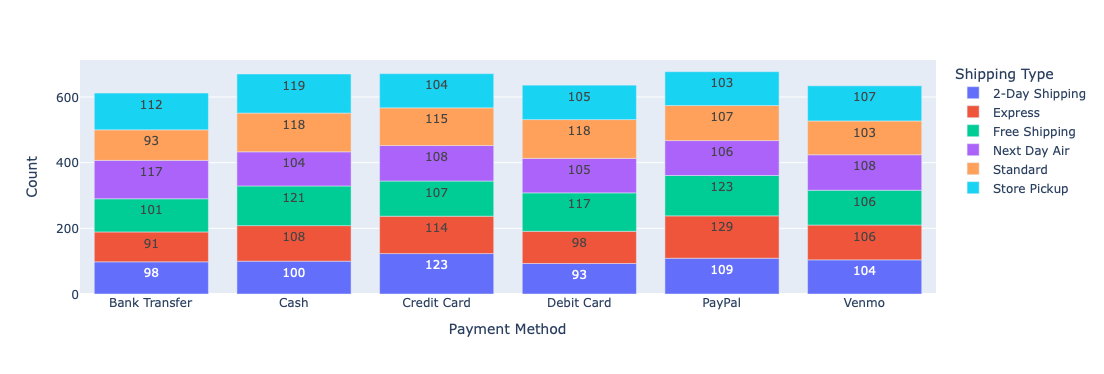

In [87]:
data = df.groupby(['Payment Method', 'Shipping Type']).size().reset_index(name='Count')
px.bar(data, x='Payment Method', y='Count', color='Shipping Type', text='Count')


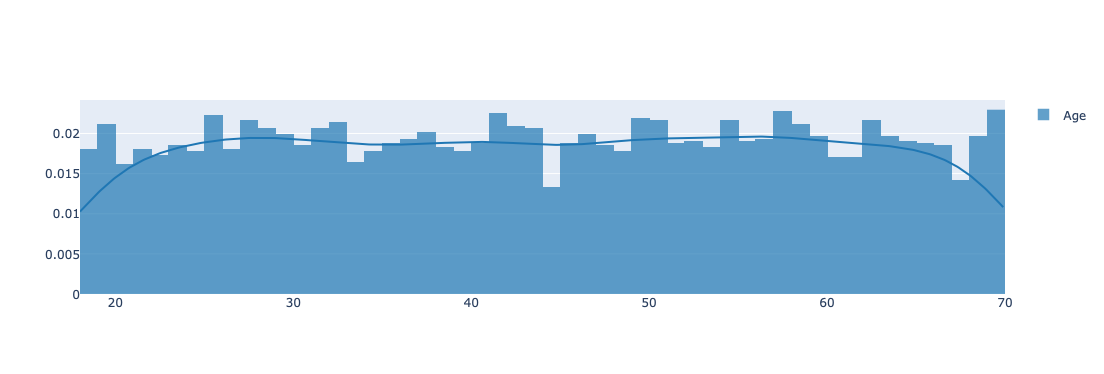

In [88]:
#total = df["Purchase Amount (USD)"].tolist()
age=df['Age'].tolist()
fig = ff.create_distplot(
    [age],                  
    group_labels=["Age"], 
    show_hist=True,
    show_rug=False
)

fig.show()

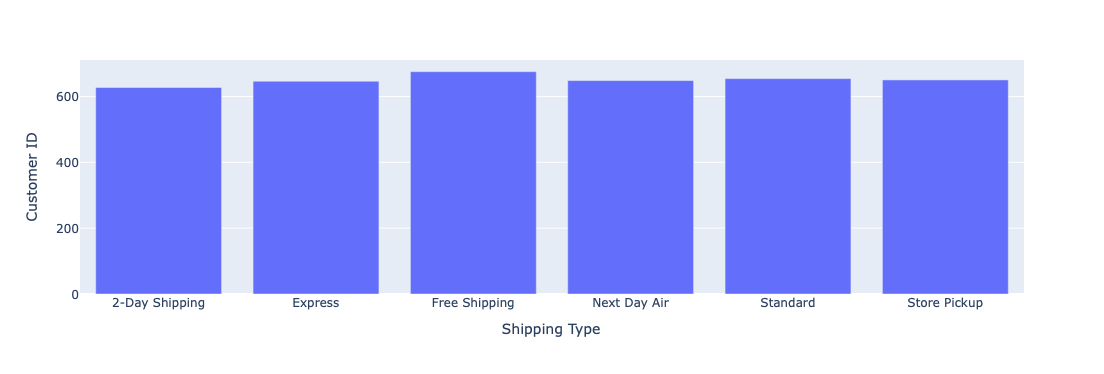

In [89]:
px.bar(df.groupby('Shipping Type')['Customer ID'].count().reset_index(),x='Shipping Type',y='Customer ID')

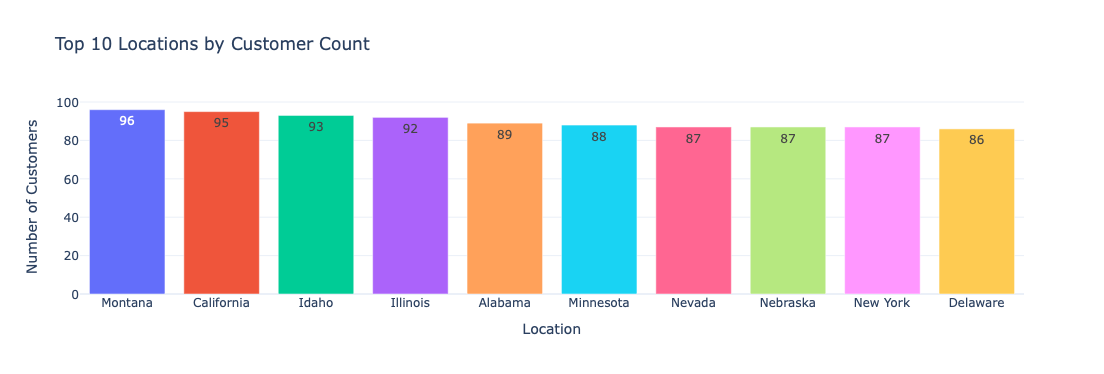

In [90]:
top_locations = (
    df.groupby('Location')['Customer ID']
    .count()
    .reset_index()
    .sort_values(by='Customer ID', ascending=False)
    .head(10)  # take top 10
)

fig = px.bar(
    top_locations,
    x='Location',
    y='Customer ID',
    text_auto=True,
    title='Top 10 Locations by Customer Count',
    color='Location'
)

fig.update_layout(
    xaxis_title='Location',
    yaxis_title='Number of Customers',
    showlegend=False,
    template='plotly_white'
)

fig.show()

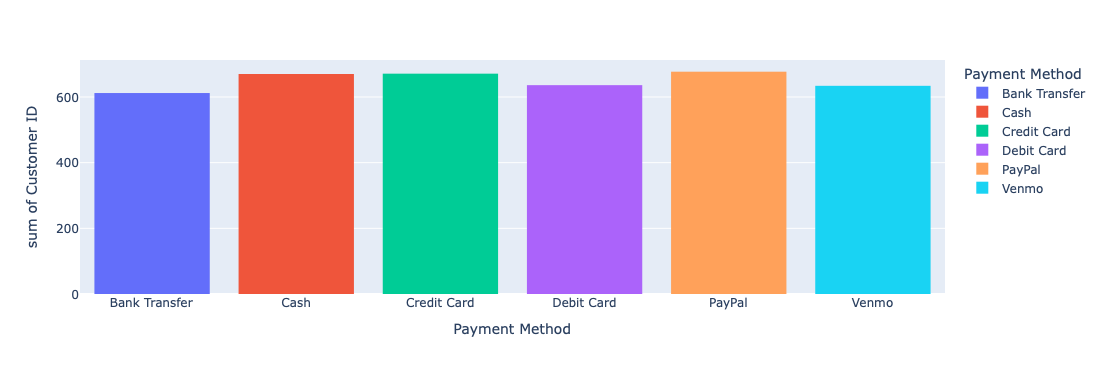

In [91]:
px.histogram(df.groupby('Payment Method')['Customer ID'].count().reset_index(),x='Payment Method',y='Customer ID',color='Payment Method')

In [8]:
%%writefile app3.py
import streamlit as st
import pandas as pd
import plotly.express as px
from streamlit_lottie import st_lottie
import requests
# ------------------ Page setup ------------------
st.set_page_config(page_title="Shopping EDA", page_icon="🛍️", layout="wide")
# put this near the top (after set_page_config)


# subtle top bar
st.markdown(
    """
    <style>
      .topbar {padding: 0.6rem 0; border-bottom: 1px solid rgba(128,128,128,0.15);}
      .metric > div {background: rgba(127,127,127,0.06); border-radius: 12px; padding: 0.6rem 0.8rem;}
    </style>
    """,
    unsafe_allow_html=True,
)

# ------------------ Data loader ------------------


df = pd.read_csv("shopping_behavior_updated.csv")

# ------------------ Sidebar ------------------
with st.sidebar:
    st.header("🧭 Navigation")
    st.caption("Switch between pages below")
    # nav at bottom after dict definition — keep UX coherent
    st.markdown("---")
    st.subheader("ℹ️ About")
    st.write("Quick EDA and sales insights. Use the filters on Page 1, then explore breakdowns on Page 2.")
    st.caption("Tip: Use the download at the bottom to export filtered data.")

# ------------------ PAGE 1 ------------------
def page1():
    st.title("🛍️ Shopping Behaviour Dashboard")
    st.markdown('<div class="topbar"></div>', unsafe_allow_html=True)

    # Filters
    left, right = st.columns(2)
    with left:
        season = st.selectbox(
            "Select Season",
            ["All"] + sorted(df["Season"].dropna().unique().tolist())
            if "Season" in df.columns else ["All"]
        )
    with right:
        payment = st.selectbox(
            "Select Payment Method",
            ["All"] + sorted(df["Payment Method"].dropna().unique().tolist())
            if "Payment Method" in df.columns else ["All"]
        )

    # Filtered copy
    filtered = df.copy()
    if "Season" in filtered.columns and season != "All":
        filtered = filtered[filtered["Season"] == season]
    if "Payment Method" in filtered.columns and payment != "All":
        filtered = filtered[filtered["Payment Method"] == payment]

    st.caption(f"Filtered: **{len(filtered):,} rows × {filtered.shape[1]} cols**")

    # KPIs
    k1, k2, k3 = st.columns(3)
    total_purchase = filtered["Purchase Amount (USD)"].sum() if "Purchase Amount (USD)" in filtered.columns else 0
    avg_rating = filtered["Review Rating"].mean() if "Review Rating" in filtered.columns else 0
    total_records = len(filtered)

    with k1:
        st.container().markdown('<div class="metric">', unsafe_allow_html=True)
        st.metric("Total Purchase (USD)", f"{total_purchase:,.0f}")
        st.container().markdown('</div>', unsafe_allow_html=True)
    with k2:
        st.container().markdown('<div class="metric">', unsafe_allow_html=True)
        st.metric("Average Rating", f"{avg_rating:,.2f}")
        st.container().markdown('</div>', unsafe_allow_html=True)
    with k3:
        st.container().markdown('<div class="metric">', unsafe_allow_html=True)
        st.metric("Total Records", f"{total_records:,}")
        st.container().markdown('</div>', unsafe_allow_html=True)

    # Tabs — same charts, nicer defaults
    tab1, tab2, tab3 = st.tabs(["📦 Category Purchases", "⭐ Rating by Gender", "📈 Season Trend"])

    with tab1:
        if {"Category", "Purchase Amount (USD)"} <= set(filtered.columns) and not filtered.empty:
            cat_sum = (
                filtered.groupby("Category", as_index=False)["Purchase Amount (USD)"]
                .sum()
                .sort_values("Purchase Amount (USD)", ascending=False)
            )
            fig1 = px.bar(
                cat_sum,
                x="Category",
                y="Purchase Amount (USD)",
                title="Total Purchase by Category",
            )
            fig1.update_layout(margin=dict(l=10, r=10, t=40, b=10))
            st.plotly_chart(fig1, use_container_width=True)
        else:
            st.info("Need columns: 'Category' & 'Purchase Amount (USD)' and non-empty data.")

    with tab2:
        if {"Gender", "Review Rating"} <= set(filtered.columns) and not filtered.empty:
            fig2 = px.box(
                filtered,
                x="Gender",
                y="Review Rating",
                title="Review Rating by Gender",
                points="all",
            )
            fig2.update_layout(margin=dict(l=10, r=10, t=40, b=10))
            st.plotly_chart(fig2, use_container_width=True)
        else:
            st.info("Need columns: 'Gender' & 'Review Rating' and non-empty data.")

    with tab3:
        if {"Season", "Purchase Amount (USD)"} <= set(filtered.columns) and not filtered.empty:
            season_sum = (
                filtered.groupby("Season", as_index=False)["Purchase Amount (USD)"]
                .sum()
            )
            fig3 = px.line(
                season_sum,
                x="Season",
                y="Purchase Amount (USD)",
                markers=True,
                title="Seasonality of Purchases",
            )
            fig3.update_layout(margin=dict(l=10, r=10, t=40, b=10))
            st.plotly_chart(fig3, use_container_width=True)
        else:
            st.info("Need columns: 'Season' & 'Purchase Amount (USD)' and non-empty data.")

    # Preview & download

# ------------------ PAGE 2 ------------------
def page2():
    st.title("📈 Sales Analysis & Insights")
    st.markdown('<div class="topbar"></div>', unsafe_allow_html=True)

    # 1) Category × Gender
    st.subheader("Overview by Category and Gender")
    if {"Category", "Gender", "Purchase Amount (USD)"} <= set(df.columns) and not df.empty:
        pivot = (
            df.groupby(["Category", "Gender"], as_index=False)["Purchase Amount (USD)"]
              .sum()
              .sort_values("Purchase Amount (USD)", ascending=False)
        )
        fig = px.bar(
            pivot,
            x="Category",
            y="Purchase Amount (USD)",
            color="Gender",
            barmode="group",
            title="Total Purchase by Category and Gender",
        )
        fig.update_layout(margin=dict(l=10, r=10, t=40, b=10))
        st.plotly_chart(fig, use_container_width=True)
    else:
        st.info("Need columns: 'Category', 'Gender', 'Purchase Amount (USD)'.")

    # 2) Payment share
    st.subheader("Payment Method Preferences")
    if {"Payment Method", "Purchase Amount (USD)"} <= set(df.columns) and not df.empty:
        pay_sum = (
            df.groupby("Payment Method", as_index=False)["Purchase Amount (USD)"]
              .sum()
              .sort_values("Purchase Amount (USD)", ascending=False)
        )
        fig2 = px.pie(
            pay_sum,
            names="Payment Method",
            values="Purchase Amount (USD)",
            title="Share of Payment Methods",
            hole=0.35,
        )
        fig2.update_layout(margin=dict(l=10, r=10, t=40, b=10))
        st.plotly_chart(fig2, use_container_width=True)
    else:
        st.info("Need columns: 'Payment Method', 'Purchase Amount (USD)'.")

    # 3) Correlations (nice, compact)
    
#------------------------PAGE3-----------------------------------------#
def page3():
    st.title("🌀 Animated Loyalty / Season Dynamics")
    st.markdown('<div class="topbar"></div>', unsafe_allow_html=True)

    # --- Check required columns ---
    needed_cols = {"Season", "Category", "Purchase Amount (USD)"}
    if not (needed_cols <= set(df.columns)):
        st.warning(f"Missing columns: {needed_cols - set(df.columns)}")
        return

    # --- Aggregate data ---
    g = (
        df.groupby(["Season", "Category"], as_index=False)["Purchase Amount (USD)"]
          .sum()
    )

    # --- Optional: make seasons ordered for nicer animation ---
    season_order = ["Winter", "Spring", "Summer", "Autumn"]
    if set(season_order).issuperset(g["Season"].unique()):
        g["Season"] = pd.Categorical(g["Season"], season_order, ordered=True)
        g = g.sort_values(["Season", "Purchase Amount (USD)"], ascending=[True, False])

    # --- Keep y-axis fixed for smoother animation ---
    y_max = g["Purchase Amount (USD)"].max() * 1.1

    # --- Animated bar chart ---
    fig = px.bar(
        g,
        x="Category",
        y="Purchase Amount (USD)",
        color="Category",
        title="Animated Purchases by Category Across Seasons"
    )
    fig2=px.treemap(df,path=['Category','Item Purchased'],
    values='Purchase Amount (USD)',
    title='Revenue Treemap: Category → Item')
     # customize annotation style

    # --- Adjust animation speed (optional) ---

    fig2.update_traces(textinfo="label+value")

    # --- Display ---
    st.plotly_chart(fig, use_container_width=True)
    st.plotly_chart(fig2,useuse_container_width=True)
    

# ------------------ Router ------------------
pgs = {
    "🏠 Home": page1,
    "💹 Sales": page2,
    "🥶Product":page3
}
pg = st.sidebar.radio("Navigate Pages:", options=list(pgs.keys()))
pgs[pg]()


Overwriting app3.py


In [9]:
! streamlit run app3.py


  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://192.168.1.32:8501

^C
  Stopping...


In [4]:
%%writefile app5.py
import streamlit as st
from streamlit_lottie import st_lottie
import requests

st.set_page_config(page_title="Lottie Demo", page_icon="🎬", layout="centered")

def load_lottie_url(url: str):
    r = requests.get(url)
    if r.status_code == 200:
        return r.json()
    else:
        st.error(f"Failed to load animation (HTTP {r.status_code})")
        return None

st.title("🎬 Streamlit Lottie Animation Demo")

# Example animation (shopping theme)
url = "https://assets2.lottiefiles.com/packages/lf20_puciaact.json"
lottie_json = load_lottie_url(url)

if lottie_json:
    st_lottie(lottie_json, height=300, loop=True, speed=1.0)
else:
    st.warning("Could not load animation. Try another URL or check your internet connection.")

st.caption("If you see a colorful animation above, Lottie is working correctly 🎉")


Writing app5.py


In [5]:
! streamlit run app5.py


  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://192.168.1.32:8501

^C
  Stopping...


In [21]:
%%writefile app7.py

import streamlit as st
from streamlit_lottie import st_lottie
import requests

st.set_page_config(page_title="EDA Animation", page_icon="📊", layout="centered")

def load_lottie(url):
    try:
        r = requests.get(url, timeout=10)
        if r.status_code == 200:
            return r.json()
    except Exception:
        pass
    return None

st.title("📊 Simple EDA Animation")

# Clean data-analysis theme (charts moving gently)
url = "https://assets1.lottiefiles.com/packages/lf20_3rwasyjy.json"  # simple analytics animation
animation = load_lottie(url)

if animation:
    st_lottie(animation, height=280, loop=True, speed=1.0)
    st.caption("👆 Ideal for EDA dashboards — clean, minimal chart motion.")
else:
    st.warning("⚠️ Couldn’t load animation (network blocked). You can download this JSON and run locally.")



Overwriting app7.py


In [23]:
! streamlit run app7.py


  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://192.168.1.32:8501

^C
  Stopping...


In [5]:
%%writefile app5.py
import os
import json
import streamlit as st
import pandas as pd
import plotly.express as px
from streamlit_lottie import st_lottie

# ------------------ Page setup (must be first) ------------------
st.set_page_config(page_title="Shopping EDA", page_icon="🛍️", layout="wide")

# ------------------ Helpers ------------------
def load_local_lottie(paths):
    """
    Try a list of possible paths and return the first valid Lottie JSON dict.
    """
    for p in paths:
        if os.path.exists(p):
            try:
                with open(p, "r", encoding="utf-8") as f:
                    return json.load(f)
            except Exception:
                pass
    return None

# ------------------ Styles ------------------
st.markdown(
    """
    <style>
      .topbar {padding: 0.6rem 0; border-bottom: 1px solid rgba(128,128,128,0.15);}
      .metric > div {background: rgba(127,127,127,0.06); border-radius: 12px; padding: 0.6rem 0.8rem;}
    </style>
    """,
    unsafe_allow_html=True,
)

# ------------------ Data loader ------------------
@st.cache_data
def load_data(path="shopping_behavior_updated.csv"):
    try:
        return pd.read_csv(path)
    except Exception as e:
        st.error(f"Could not load data: {e}")
        return pd.DataFrame()

df = load_data()

# ------------------ Sidebar ------------------
with st.sidebar:
    st.header("🧭 Navigation")
    st.caption("Switch between pages below")
    st.markdown("---")
    st.subheader("ℹ️ About")
    st.write("Quick EDA and sales insights. Use the filters on Page 1, then explore breakdowns on Page 2.")
    st.caption("Tip: Use the download at the bottom to export filtered data.")

# ------------------ PAGE 1 ------------------
def page1():
    st.title("🛍️ Shopping Behaviour Dashboard")
    st.markdown('<div class="topbar"></div>', unsafe_allow_html=True)

    # ---- Local Lottie hero (no internet needed) ----
    lottie = load_local_lottie([
        "Remix of Our vision.json",
        "/mnt/data/Remix of Our vision.json",  # fallback if running in a sandbox
        "lotties/eda.json"
    ])
    if lottie:
        st_lottie(lottie, height=220, loop=True, speed=1.0)
        st.caption("✅ Local animation (no network required).")
    else:
        st.info("Add a local Lottie JSON (e.g., 'Remix of Our vision.json') next to app3.py to see the header animation.")

    if df.empty:
        st.warning("Dataframe is empty. Make sure 'shopping_behavior_updated.csv' is present.")
        return

    # Filters
    left, right = st.columns(2)
    with left:
        season = st.selectbox(
            "Select Season",
            ["All"] + (sorted(df["Season"].dropna().unique().tolist()) if "Season" in df.columns else [])
        )
    with right:
        payment = st.selectbox(
            "Select Payment Method",
            ["All"] + (sorted(df["Payment Method"].dropna().unique().tolist()) if "Payment Method" in df.columns else [])
        )

    # Filtered copy
    filtered = df.copy()
    if "Season" in filtered.columns and season != "All":
        filtered = filtered[filtered["Season"] == season]
    if "Payment Method" in filtered.columns and payment != "All":
        filtered = filtered[filtered["Payment Method"] == payment]

    st.caption(f"Filtered: **{len(filtered):,} rows × {filtered.shape[1]} cols**")

    # KPIs
    k1, k2, k3 = st.columns(3)
    total_purchase = filtered["Purchase Amount (USD)"].sum() if "Purchase Amount (USD)" in filtered.columns else 0
    avg_rating = filtered["Review Rating"].mean() if "Review Rating" in filtered.columns and not filtered.empty else 0
    total_records = len(filtered)

    with k1:
        st.container().markdown('<div class="metric">', unsafe_allow_html=True)
        st.metric("Total Purchase (USD)", f"{total_purchase:,.0f}")
        st.container().markdown('</div>', unsafe_allow_html=True)
    with k2:
        st.container().markdown('<div class="metric">', unsafe_allow_html=True)
        st.metric("Average Rating", f"{avg_rating:,.2f}")
        st.container().markdown('</div>', unsafe_allow_html=True)
    with k3:
        st.container().markdown('<div class="metric">', unsafe_allow_html=True)
        st.metric("Total Records", f"{total_records:,}")
        st.container().markdown('</div>', unsafe_allow_html=True)

    # Tabs — same charts, nicer defaults
    tab1, tab2, tab3 = st.tabs(["📦 Category Purchases", "⭐ Rating by Gender", "📈 Season Trend"])

    with tab1:
        if {"Category", "Purchase Amount (USD)"} <= set(filtered.columns) and not filtered.empty:
            cat_sum = (
                filtered.groupby("Category", as_index=False)["Purchase Amount (USD)"]
                .sum()
                .sort_values("Purchase Amount (USD)", ascending=False)
            )
            fig1 = px.bar(cat_sum, x="Category", y="Purchase Amount (USD)", title="Total Purchase by Category")
            fig1.update_layout(margin=dict(l=10, r=10, t=40, b=10))
            st.plotly_chart(fig1, use_container_width=True)
        else:
            st.info("Need columns: 'Category' & 'Purchase Amount (USD)' and non-empty data.")

    with tab2:
        if {"Gender", "Review Rating"} <= set(filtered.columns) and not filtered.empty:
            fig2 = px.box(filtered, x="Gender", y="Review Rating", title="Review Rating by Gender", points="all")
            fig2.update_layout(margin=dict(l=10, r=10, t=40, b=10))
            st.plotly_chart(fig2, use_container_width=True)
        else:
            st.info("Need columns: 'Gender' & 'Review Rating' and non-empty data.")

    with tab3:
        if {"Season", "Purchase Amount (USD)"} <= set(filtered.columns) and not filtered.empty:
            season_sum = filtered.groupby("Season", as_index=False)["Purchase Amount (USD)"].sum()
            fig3 = px.line(season_sum, x="Season", y="Purchase Amount (USD)", markers=True, title="Seasonality of Purchases")
            fig3.update_layout(margin=dict(l=10, r=10, t=40, b=10))
            st.plotly_chart(fig3, use_container_width=True)
        else:
            st.info("Need columns: 'Season' & 'Purchase Amount (USD)' and non-empty data.")

# ------------------ PAGE 2 ------------------
def page2():
    st.title("📈 Sales Analysis & Insights")
    st.markdown('<div class="topbar"></div>', unsafe_allow_html=True)

    if df.empty:
        st.warning("Dataframe is empty. Make sure 'shopping_behavior_updated.csv' is present.")
        return

    # 1) Category × Gender
    st.subheader("Overview by Category and Gender")
    if {"Category", "Gender", "Purchase Amount (USD)"} <= set(df.columns):
        pivot = (
            df.groupby(["Category", "Gender"], as_index=False)["Purchase Amount (USD)"]
              .sum()
              .sort_values("Purchase Amount (USD)", ascending=False)
        )
        fig = px.bar(
            pivot, x="Category", y="Purchase Amount (USD)", color="Gender",
            barmode="group", title="Total Purchase by Category and Gender",
        )
        fig.update_layout(margin=dict(l=10, r=10, t=40, b=10))
        st.plotly_chart(fig, use_container_width=True)
    else:
        st.info("Need columns: 'Category', 'Gender', 'Purchase Amount (USD)'.")

    # 2) Payment share
    st.subheader("Payment Method Preferences")
    if {"Payment Method", "Purchase Amount (USD)"} <= set(df.columns):
        pay_sum = (
            df.groupby("Payment Method", as_index=False)["Purchase Amount (USD)"]
              .sum()
              .sort_values("Purchase Amount (USD)", ascending=False)
        )
        fig2 = px.pie(pay_sum, names="Payment Method", values="Purchase Amount (USD)", title="Share of Payment Methods", hole=0.35)
        fig2.update_layout(margin=dict(l=10, r=10, t=40, b=10))
        st.plotly_chart(fig2, use_container_width=True)
    else:
        st.info("Need columns: 'Payment Method', 'Purchase Amount (USD)'.")

# ------------------ PAGE 3 ------------------
def page3():
    st.title("🌀 Animated Loyalty / Season Dynamics")
    st.markdown('<div class="topbar"></div>', unsafe_allow_html=True)

    if df.empty:
        st.warning("Dataframe is empty. Make sure 'shopping_behavior_updated.csv' is present.")
        return

    # --- Check required columns ---
    needed_cols = {"Season", "Category", "Purchase Amount (USD)"}
    if not (needed_cols <= set(df.columns)):
        st.warning(f"Missing columns: {needed_cols - set(df.columns)}")
        return

    # --- Aggregate data ---
    g = df.groupby(["Season", "Category"], as_index=False)["Purchase Amount (USD)"].sum()

    # --- Optional: make seasons ordered for nicer animation ---
    season_order = ["Winter", "Spring", "Summer", "Autumn"]
    if set(season_order).issuperset(set(g["Season"].unique())):
        g["Season"] = pd.Categorical(g["Season"], season_order, ordered=True)
        g = g.sort_values(["Season", "Purchase Amount (USD)"], ascending=[True, False])

    # --- Keep y-axis fixed for smoother animation ---
    y_max = float(g["Purchase Amount (USD)"].max()) * 1.1 if not g.empty else 1.0

    # --- Animated bar chart (animation_frame added) ---
    if g["Season"].nunique() < 2:
        st.info("Animation requires at least two different seasons in the data.")
    fig = px.bar(
        g,
        x="Category",
        y="Purchase Amount (USD)",
        color="Category",
        animation_frame="Season",
        category_orders={"Season": season_order} if set(season_order).issuperset(set(g["Season"].unique())) else None,
        title="Animated Purchases by Category Across Seasons"
    )
    fig.update_layout(margin=dict(l=10, r=10, t=40, b=10))
    fig.update_yaxes(range=[0, y_max])
    st.plotly_chart(fig, use_container_width=True)

    # --- Treemap (optional; only if Item Purchased present) ---
    if {"Category", "Item Purchased", "Purchase Amount (USD)"} <= set(df.columns):
        fig2 = px.treemap(
            df,
            path=['Category','Item Purchased'],
            values='Purchase Amount (USD)',
            title='Revenue Treemap: Category → Item'
        )
        fig2.update_traces(textinfo="label+value")
        st.plotly_chart(fig2, use_container_width=True)
    else:
        st.caption("Add an 'Item Purchased' column to enable the Revenue Treemap.")

# ------------------ Router ------------------
pgs = {
    "🏠 Home": page1,
    "💹 Sales": page2,
    "🥶Product": page3
}
pg = st.sidebar.radio("Navigate Pages:", options=list(pgs.keys()))
pgs[pg]()


Overwriting app3.py
